In [1]:
#Setup Environment

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
pd.options.display.max_colwidth = 300
import os

In [2]:
#Test Web Scraping

option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
driver = webdriver.Chrome(options=option)

jobs = []
keyword = ['data-analyst-jobs', 'Data-Science-jobs']
for kw in keyword: 
# URL API
    url = f"https://id.jobstreet.com/id/{kw}"
    driver.get(url)
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs.extend(soup.find_all('article'))

driver.quit()

In [3]:
for job in jobs:
    title = job.find('a', {'data-automation': 'jobTitle'})
    if title:
        print(title.text.strip())

Data Analyst for FnB Industri
Data Analyst
Operation Data Analyst
Data Analyst
Data Analyst & Admin Executive
Data Analyst
Data Analyst
DATA ANALYST
Business Analyst Manager
Data Analyst
Data Analyst Manager
Data Scientist
Senior Financial Data Analyst – Acclime Atlas
Price & Product Analyst
Data & Reporting Analyst (Full-Time)
DATA ANALYST
Data Analyst
Corporate Business Strategic Analyst
Data Analyst
Data Analyst
Data Analyst Officer for Merchandising Division
Business Performance Analysis
Business Analyst
FINANCE ANALYST
Sales Operations Analyst
Pricing Analyst
Data Analyst
Marketing Data Analyst
BUSINESS ANALYST
Division Head Business Analyst & Perfomance
Data Analyst
Claim Analyst
Data Scientist
Data Analyst
Data Analyst for FnB Industri
Operation Data Analyst
Risk Modelling Data Scientist
Dosen Prodi Data Science (UBM Kampus Serpong)
Data Scientist
Data Scientist
Data Scientist
Data Science
Data Analyst
Data Analyst
Data Scientist
Data Analyst
Data Analyst
Data Analyst - Customer

In [4]:
for job in jobs:
    company = job.find('a', {'data-automation': 'jobCompany'})
    if company:
        print(company.text.strip())

PT Rajafa Boga Dunia
PT Dua Naga Kosmetindo
PT. KTC COAL MINING & ENERGY
PT Trans Antar Nusabird
Lee Kum Kee (M) Foods Sdn Bhd
IDS Medical Systems Group
SURYA SUKSES
Staffinc
PT Asia Sakti Wahid Foods Manufacture
PT Dipo Star Finance
PT Matahari Department Store Tbk
PT SMART,Tbk
PT Acclime Consulting Indonesia
PT. Bintang Internasional
Briton English Education
PT GADAI JADI BERKAH
Altius Hospital
PT Dipo Star Finance
ESQ Group
PT. CALIM BERKAT SEJAHTERA
PT Matahari Department Store Tbk
PT. Dwidaya World Wide
PT Gurita Lintas Samudera
PT Alun Indah
PT Carbay Services Indonesia
China Telecom (Asia Pacific) Pte Ltd
PT. TEMAS TBK
PT Industri Jamu Dan Farmasi Sido Muncul, Tbk
PT Prym Intimates Indonesia
PT Morula Indonesia
PT Sumber Bangun Kuat
PT Andika Mitra Sejati
PT SMART,Tbk
PT Dua Naga Kosmetindo
PT Rajafa Boga Dunia
PT. KTC COAL MINING & ENERGY
PT Adira Dinamika Multi Finance Tbk
Universitas Bunda Mulia (Yayasan Pendidikan Bunda Mulia )
PT Kamoro Maxima Integra
PT. Padepokan Tujuh Se

In [5]:
# Salary
for job in jobs:
    salary = job.find('span', {'data-automation': 'jobSalary'})
    print(salary.text.strip() if salary else 'NaN')

Rp 10.000.000 – Rp 13.000.000 per month
Rp 2.000.000 – Rp 3.000.000 per month
NaN
NaN
NaN
NaN
NaN
Rp 8.000.000 – Rp 10.000.000 per month
NaN
Rp 5.500.000 – Rp 8.000.000 per month
NaN
NaN
NaN
NaN
NaN
Rp 6.000.000 – Rp 8.000.000 per month
NaN
Rp 8.000.000 – Rp 10.000.000 per month
Rp 5,200,000 – Rp 6,000,000 per month
Rp 4.000.000 – Rp 5.000.000 per month
NaN
NaN
NaN
NaN
Rp 6.000.000 – Rp 9.000.000 per month
NaN
NaN
NaN
NaN
NaN
Rp 5.000.000 – Rp 6.000.000 per month
NaN
NaN
Rp 2.000.000 – Rp 3.000.000 per month
Rp 10.000.000 – Rp 13.000.000 per month
NaN
NaN
NaN
NaN
Rp 7.000.000 – Rp 10.000.000 per month
NaN
NaN
NaN
NaN
NaN
Rp 5.500.000 – Rp 8.000.000 per month
Rp 4.000.000 – Rp 5.000.000 per month
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
Rp 5.000.000 – Rp 6.000.000 per month
NaN
NaN
NaN
NaN
NaN
NaN
Rp 8.000.000 – Rp 10.000.000 per month


In [6]:
# Scraping data general di jobstreet dengan keyword data analyst dan data science 
# Diambil 10 halaman tiap keyword

option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
driver = webdriver.Chrome(options=option)

results = [] # List to store the result
MAX_PAGES = 10  # Maximal pages

keyword = ['data-analyst-jobs', 'Data-Science-jobs']
for kw in keyword:
    for page in range(1, MAX_PAGES + 1):
        url = f"https://id.jobstreet.com/id/{kw}?page={page}"
        print(f"Scraping {kw} page {page}...")
        driver.get(url)
        time.sleep(2)  # Waiting for page loading

        # Scroll to End Content
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)

        # Parse HTML
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        jobs = soup.find_all('article')

        for job in jobs:
            title = job.find('a', {'data-automation': 'jobTitle'})
            company = job.find('a', {'data-automation': 'jobCompany'})
            link = 'https://id.jobstreet.com' + title['href'] if title and title.has_attr('href') else 'NaN'

            if title and company:
                job_info = {
                    'title': title.text.strip(),
                    'company': company.text.strip(),
                    'link': link
                }
                results.append(job_info)

driver.quit()

Scraping data-analyst-jobs page 1...
Scraping data-analyst-jobs page 2...
Scraping data-analyst-jobs page 3...
Scraping data-analyst-jobs page 4...
Scraping data-analyst-jobs page 5...
Scraping data-analyst-jobs page 6...
Scraping data-analyst-jobs page 7...
Scraping data-analyst-jobs page 8...
Scraping data-analyst-jobs page 9...
Scraping data-analyst-jobs page 10...
Scraping Data-Science-jobs page 1...
Scraping Data-Science-jobs page 2...
Scraping Data-Science-jobs page 3...
Scraping Data-Science-jobs page 4...
Scraping Data-Science-jobs page 5...
Scraping Data-Science-jobs page 6...
Scraping Data-Science-jobs page 7...
Scraping Data-Science-jobs page 8...
Scraping Data-Science-jobs page 9...
Scraping Data-Science-jobs page 10...


In [7]:
df_job = pd.DataFrame(results)
df_job.head()

,title,company,link
0,Data Analyst for FnB Industri,PT Rajafa Boga Dunia,https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=f70beac12eecc99ae08575167b32c328bad94e16
1,Data Analyst,PT Dua Naga Kosmetindo,https://id.jobstreet.com/id/job/86688405?type=standard&ref=search-standalone&origin=cardTitle#sol=2477ac23ec270879e4848a290018b9c6d85b2895
2,Operation Data Analyst,PT. KTC COAL MINING & ENERGY,https://id.jobstreet.com/id/job/86648760?type=standard&ref=search-standalone&origin=cardTitle#sol=7bee94b1d7df7786239a4fd7a20a1d73e4e26ebe
3,Data Analyst,PT Trans Antar Nusabird,https://id.jobstreet.com/id/job/86350407?type=standard&ref=search-standalone&origin=cardTitle#sol=a8467931bcc742a868fd250400367ce7e3ee46f8
4,Data Analyst & Admin Executive,Lee Kum Kee (M) Foods Sdn Bhd,https://id.jobstreet.com/id/job/86615264?type=standard&ref=search-standalone&origin=cardTitle#sol=549c53037accf3e38f8d0652e701cb36f7658c3d


In [8]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    628 non-null    object
 1   company  628 non-null    object
 2   link     628 non-null    object
dtypes: object(3)
memory usage: 14.8+ KB


In [9]:
df_job.duplicated().sum()

np.int64(0)

In [10]:
# Save to CSV format
df_job.to_csv('jobstreet_data_analyst_general.csv', index=False)
print(f"Total lowongan terkumpul: {len(df_job)}")

Total lowongan terkumpul: 628


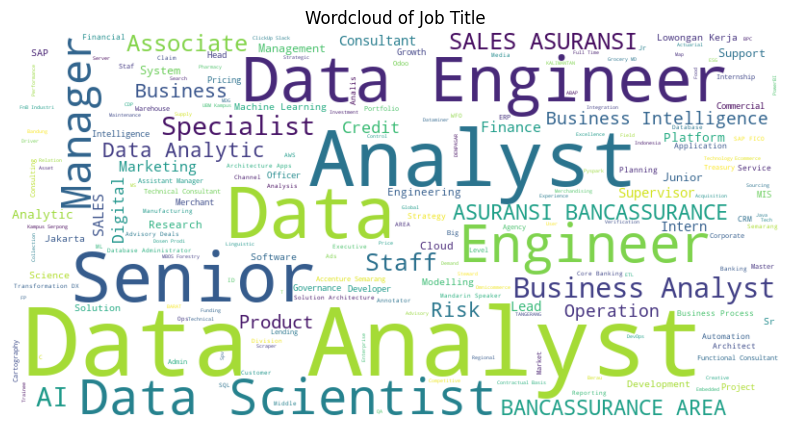

In [11]:
text = " ".join(df_job['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud of Job Title")
plt.show()

Insight:

Hasil pencarian yang paling sering muncul adalah yang mengandung kata 'data', 'analyst',  'engineer', 'scientist', 'bussiness'. Berarti profesi data analyst adalah job yang paling banyak ditawarkan dibandingkan dengan posisi lainnya. Ada juga kata 'senior', yang menunjukkan ada kebutuhan di tingkatan karier.


In [12]:
for index, row in df_job.iterrows():
    link = row['link']
    print(index,'-', link)

0 - https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=f70beac12eecc99ae08575167b32c328bad94e16
1 - https://id.jobstreet.com/id/job/86688405?type=standard&ref=search-standalone&origin=cardTitle#sol=2477ac23ec270879e4848a290018b9c6d85b2895
2 - https://id.jobstreet.com/id/job/86648760?type=standard&ref=search-standalone&origin=cardTitle#sol=7bee94b1d7df7786239a4fd7a20a1d73e4e26ebe
3 - https://id.jobstreet.com/id/job/86350407?type=standard&ref=search-standalone&origin=cardTitle#sol=a8467931bcc742a868fd250400367ce7e3ee46f8
4 - https://id.jobstreet.com/id/job/86615264?type=standard&ref=search-standalone&origin=cardTitle#sol=549c53037accf3e38f8d0652e701cb36f7658c3d
5 - https://id.jobstreet.com/id/job/86262794?type=standard&ref=search-standalone&origin=cardTitle#sol=80e40ba07b3ff9133768640ab7d24b78dba37d6d
6 - https://id.jobstreet.com/id/job/86614893?type=standard&ref=search-standalone&origin=cardTitle#sol=86c78610c320e17baafe224efd04a43d48a34459

In [13]:
# Scraping data details tiap link di data general

option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
driver = webdriver.Chrome(options=option)

job_details = []

for index, row in df_job.iterrows():
    link = row['link']
    print(f"Scraping-{index}: {link}")
    driver.get(link)
    time.sleep(0.5)
    
    soup = BeautifulSoup(driver.page_source, "html.parser")
   
    title = soup.find('h1', {'data-automation': 'job-detail-title'})
    title = title.text.strip() if title else 'NaN'
    
    company = soup.find('span', {'data-automation': 'advertiser-name'})
    company = company.text.strip() if company else 'NaN'
    
    company_rating = soup.find('span', {'data-automation': 'company-review'})
    company_rating = company_rating.text.strip() if company_rating else 'NaN'

    location = soup.find('span', {'data-automation': 'job-detail-location'})
    location = location.text.strip() if location else 'NaN'
    
    salary = soup.find('span', {'data-automation': 'job-detail-salary'})
    salary = salary.text.strip() if salary else 'NaN'
    
    classification = soup.find('span', {'data-automation': 'job-detail-classifications'})
    classification = classification.text.strip() if classification else 'NaN'
    
    work_type = soup.find('span', {'data-automation': 'job-detail-work-type'})
    work_type = work_type.text.strip() if work_type else 'NaN'
    
    if title and company and link:
        job_details.append({
            "link": link,
            "job_title": title,
            "company": company,
            "company_rating": company_rating,
            "location": location,
            "salary": salary,
            "job_classification": classification,
            "work_type": work_type,       
        })

driver.quit()

Scraping-0: https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=f70beac12eecc99ae08575167b32c328bad94e16
Scraping-1: https://id.jobstreet.com/id/job/86688405?type=standard&ref=search-standalone&origin=cardTitle#sol=2477ac23ec270879e4848a290018b9c6d85b2895
Scraping-2: https://id.jobstreet.com/id/job/86648760?type=standard&ref=search-standalone&origin=cardTitle#sol=7bee94b1d7df7786239a4fd7a20a1d73e4e26ebe
Scraping-3: https://id.jobstreet.com/id/job/86350407?type=standard&ref=search-standalone&origin=cardTitle#sol=a8467931bcc742a868fd250400367ce7e3ee46f8
Scraping-4: https://id.jobstreet.com/id/job/86615264?type=standard&ref=search-standalone&origin=cardTitle#sol=549c53037accf3e38f8d0652e701cb36f7658c3d
Scraping-5: https://id.jobstreet.com/id/job/86262794?type=standard&ref=search-standalone&origin=cardTitle#sol=80e40ba07b3ff9133768640ab7d24b78dba37d6d
Scraping-6: https://id.jobstreet.com/id/job/86614893?type=standard&ref=search-standalone&origi

In [14]:
df_job_details = pd.DataFrame(job_details)
df_job_details.tail()

,link,job_title,company,company_rating,location,salary,job_classification,work_type
623,https://id.jobstreet.com/id/job/85235364?type=standard&ref=search-standalone&origin=cardTitle#sol=482cc096174833aa9b37481e73f36e9d4738829d,Technical Support,PT Cybertrend Intrabuana,4.3,"Pasar Minggu, Jakarta Raya",NaN,Administrasi Jaringan & Sistem (Teknologi Informasi & Komunikasi),Full time
624,https://id.jobstreet.com/id/job/86187556?type=standard&ref=search-standalone&origin=cardTitle#sol=292317b80857fa87dabe7a5659c0014b29f3d2e1,GenAI Creative Optimisation Analyst (Senior Data Analyst),Oliver – SEAPAC,NaN,Jakarta Raya (Hibrid),NaN,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time
625,https://id.jobstreet.com/id/job/85786899?type=standard&ref=search-standalone&origin=cardTitle#sol=a773877930a004d1e17abc254181098a9f5ff675,KOL Spesialist & Data Analyst,Haswara Anjaya Akeh (BDG),NaN,"Bandung, Jawa Barat",NaN,Pemasaran Digital & Pencarian (Pemasaran & Komunikasi),Full time
626,https://id.jobstreet.com/id/job/86232405?type=standard&ref=search-standalone&origin=cardTitle#sol=c99d2a2f4bd15d552cb71adc20044fcd8acbc3de,AI Operation Staff,PT Industrial Multi Fan,3.3,"Jakarta Barat, Jakarta Raya",NaN,Teknik – Perangkat Lunak (Teknologi Informasi & Komunikasi),Full time
627,https://id.jobstreet.com/id/job/86456118?type=standard&ref=search-standalone&origin=cardTitle#sol=04df45988fc5bfc9e579dfc24f7151f019d9312e,Growth Intern,SEVEN Retail Group,NaN,"Jakarta Selatan, Jakarta Raya",NaN,Strategi & Perencanaan (Konsultasi & Strategi),Kontrak/Temporer


In [15]:
# Save to CSV format
df_job_details.to_csv('jobstreet_data_analyst_detail.csv', index=False)
print(f"Total lowongan terkumpul: {len(df_job)}")

Total lowongan terkumpul: 628


==============================================================================================================

Tujuan:

Tujuan EDA kali ini, adalah untuk mengetahui average salary yang bisa ditawarkan perusahaan di Jobstreet untuk profesi Data Analyst dan Data Scientist (berdasarkan lowongan yang menampilkan salary di deskripsi lowongan).

1. Data Cleaning

In [16]:
df_job_details.head()

,link,job_title,company,company_rating,location,salary,job_classification,work_type
0,https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=f70beac12eecc99ae08575167b32c328bad94e16,Data Analyst for FnB Industri,PT Rajafa Boga Dunia,NaN,Jakarta Raya,Rp 10.000.000 – Rp 13.000.000 per month,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time
1,https://id.jobstreet.com/id/job/86688405?type=standard&ref=search-standalone&origin=cardTitle#sol=2477ac23ec270879e4848a290018b9c6d85b2895,Data Analyst,PT Dua Naga Kosmetindo,NaN,"Sukoharjo, Jawa Tengah",Rp 2.000.000 – Rp 3.000.000 per month,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Kontrak/Temporer
2,https://id.jobstreet.com/id/job/86648760?type=standard&ref=search-standalone&origin=cardTitle#sol=7bee94b1d7df7786239a4fd7a20a1d73e4e26ebe,Operation Data Analyst,PT. KTC COAL MINING & ENERGY,3.3,"Samarinda, Kalimantan Timur",NaN,Pengembangan & Administrasi Database (Teknologi Informasi & Komunikasi),Full time
3,https://id.jobstreet.com/id/job/86350407?type=standard&ref=search-standalone&origin=cardTitle#sol=a8467931bcc742a868fd250400367ce7e3ee46f8,Data Analyst,PT Trans Antar Nusabird,4.3,"Jakarta Selatan, Jakarta Raya",NaN,"Analisis & Pelaporan (Manufaktur, Transportasi & Logistik)",Kontrak/Temporer
4,https://id.jobstreet.com/id/job/86615264?type=standard&ref=search-standalone&origin=cardTitle#sol=549c53037accf3e38f8d0652e701cb36f7658c3d,Data Analyst & Admin Executive,Lee Kum Kee (M) Foods Sdn Bhd,4.1,"Tangerang, Banten",NaN,Administrasi Klien & Penjualan (Administrasi & Dukungan Perkantoran),Full time


In [17]:
# Normalisasi kolom salary
df_job_details['salary'] = df_job_details['salary'].astype(str).str.replace(r"[–—]", "-", regex=True)
df_job_details['salary'] = df_job_details['salary'].str.replace("Rp", "", regex=True)
df_job_details['salary'] = df_job_details['salary'].str.replace("per month", "", regex=True)
df_job_details['salary'] = df_job_details['salary'].str.replace(r"[.,]", "", regex=True)  # hilangin titik pemisah ribuan

# Ekstrak angka min dan max
df_job_details[['salary_min', 'salary_max']] = df_job_details['salary'].str.extract(r'(\d+)\s*-\s*(\d+)')

# Jika hanya ada salary min, isi salary max dengan salary min
df_job_details['salary_max'] = df_job_details['salary_max'].fillna(df_job_details['salary_min'])

# Convert ke angka
df_job_details['salary_min'] = pd.to_numeric(df_job_details['salary_min'], errors='coerce')
df_job_details['salary_max'] = pd.to_numeric(df_job_details['salary_max'], errors='coerce')

In [18]:
df_job_details

,link,job_title,company,company_rating,location,salary,job_classification,work_type,salary_min,salary_max
0,https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=f70beac12eecc99ae08575167b32c328bad94e16,Data Analyst for FnB Industri,PT Rajafa Boga Dunia,NaN,Jakarta Raya,10000000 - 13000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,10000000.0,13000000.0
1,https://id.jobstreet.com/id/job/86688405?type=standard&ref=search-standalone&origin=cardTitle#sol=2477ac23ec270879e4848a290018b9c6d85b2895,Data Analyst,PT Dua Naga Kosmetindo,NaN,"Sukoharjo, Jawa Tengah",2000000 - 3000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Kontrak/Temporer,2000000.0,3000000.0
2,https://id.jobstreet.com/id/job/86648760?type=standard&ref=search-standalone&origin=cardTitle#sol=7bee94b1d7df7786239a4fd7a20a1d73e4e26ebe,Operation Data Analyst,PT. KTC COAL MINING & ENERGY,3.3,"Samarinda, Kalimantan Timur",NaN,Pengembangan & Administrasi Database (Teknologi Informasi & Komunikasi),Full time,NaN,NaN
3,https://id.jobstreet.com/id/job/86350407?type=standard&ref=search-standalone&origin=cardTitle#sol=a8467931bcc742a868fd250400367ce7e3ee46f8,Data Analyst,PT Trans Antar Nusabird,4.3,"Jakarta Selatan, Jakarta Raya",NaN,"Analisis & Pelaporan (Manufaktur, Transportasi & Logistik)",Kontrak/Temporer,NaN,NaN
4,https://id.jobstreet.com/id/job/86615264?type=standard&ref=search-standalone&origin=cardTitle#sol=549c53037accf3e38f8d0652e701cb36f7658c3d,Data Analyst & Admin Executive,Lee Kum Kee (M) Foods Sdn Bhd,4.1,"Tangerang, Banten",NaN,Administrasi Klien & Penjualan (Administrasi & Dukungan Perkantoran),Full time,NaN,NaN
5,https://id.jobstreet.com/id/job/86262794?type=standard&ref=search-standalone&origin=cardTitle#sol=80e40ba07b3ff9133768640ab7d24b78dba37d6d,Data Analyst,IDS Medical Systems Group,NaN,"Jakarta Barat, Jakarta Raya",NaN,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,NaN,NaN
6,https://id.jobstreet.com/id/job/86614893?type=standard&ref=search-standalone&origin=cardTitle#sol=86c78610c320e17baafe224efd04a43d48a34459,Data Analyst,SURYA SUKSES,5.0,"Bekasi, Jawa Barat",NaN,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,NaN,NaN
7,https://id.jobstreet.com/id/job/86582415?type=standard&ref=search-standalone&origin=cardTitle#sol=00d7d5dca96113a4b1de91e35827659d758de8ae,DATA ANALYST,Staffinc,NaN,"Surabaya, Jawa Timur",8000000 - 10000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,8000000.0,10000000.0
8,https://id.jobstreet.com/id/job/86688879?type=standard&ref=search-standalone&origin=cardTitle#sol=fd159b4a01916a79041296d17e71a0136bd72ae2,Business Analyst Manager,PT Asia Sakti Wahid Foods Manufacture,3.7,"Medan, Sumatera Utara",NaN,Manajemen (Teknologi Informasi & Komunikasi),Full time,NaN,NaN
9,https://id.jobstreet.com/id/job/86513778?type=standard&ref=search-standalone&origin=cardTitle#sol=b4c003319db10fe911164c10a0ad4f9357633464,Data Analyst,PT Dipo Star Finance,4.1,Jakarta Raya,5500000 - 8000000,Analisis & Pelaporan (Perbankan & Layanan Finansial),Full time,5500000.0,8000000.0


In [19]:
df_job_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   link                628 non-null    object 
 1   job_title           628 non-null    object 
 2   company             628 non-null    object 
 3   company_rating      628 non-null    object 
 4   location            628 non-null    object 
 5   salary              628 non-null    object 
 6   job_classification  628 non-null    object 
 7   work_type           628 non-null    object 
 8   salary_min          121 non-null    float64
 9   salary_max          121 non-null    float64
dtypes: float64(2), object(8)
memory usage: 49.2+ KB


In [20]:
df_job_details[df_job_details['salary'] == 'NaN'].shape[0]

506

In [21]:
df_job_details[df_job_details['salary_min'].isna()].shape[0]

507

In [22]:
df_job_details[df_job_details['salary_max'].isna()].shape[0]

507

In [23]:
# Karena nilai NaN nya tidak sama, maka perlu di cek manual 
df_job_details[df_job_details['salary'] != 'NaN']

,link,job_title,company,company_rating,location,salary,job_classification,work_type,salary_min,salary_max
0,https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=f70beac12eecc99ae08575167b32c328bad94e16,Data Analyst for FnB Industri,PT Rajafa Boga Dunia,NaN,Jakarta Raya,10000000 - 13000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,10000000.0,13000000.0
1,https://id.jobstreet.com/id/job/86688405?type=standard&ref=search-standalone&origin=cardTitle#sol=2477ac23ec270879e4848a290018b9c6d85b2895,Data Analyst,PT Dua Naga Kosmetindo,NaN,"Sukoharjo, Jawa Tengah",2000000 - 3000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Kontrak/Temporer,2000000.0,3000000.0
7,https://id.jobstreet.com/id/job/86582415?type=standard&ref=search-standalone&origin=cardTitle#sol=00d7d5dca96113a4b1de91e35827659d758de8ae,DATA ANALYST,Staffinc,NaN,"Surabaya, Jawa Timur",8000000 - 10000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,8000000.0,10000000.0
9,https://id.jobstreet.com/id/job/86513778?type=standard&ref=search-standalone&origin=cardTitle#sol=b4c003319db10fe911164c10a0ad4f9357633464,Data Analyst,PT Dipo Star Finance,4.1,Jakarta Raya,5500000 - 8000000,Analisis & Pelaporan (Perbankan & Layanan Finansial),Full time,5500000.0,8000000.0
15,https://id.jobstreet.com/id/job/86115605?type=standard&ref=search-standalone&origin=cardTitle#sol=1a9ae612d8c520d7370fe1d95e0ca5b2989876a8,DATA ANALYST,PT GADAI JADI BERKAH,NaN,"Tangerang, Banten",6000000 - 8000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,6000000.0,8000000.0
17,https://id.jobstreet.com/id/job/86559839?type=standard&ref=search-standalone&origin=cardTitle#sol=5ba427c7ab4f547e28a03e89667d4b877deaa6c9,Corporate Business Strategic Analyst,PT Dipo Star Finance,4.1,"Jakarta Pusat, Jakarta Raya",8000000 - 10000000,Strategi & Perencanaan (Konsultasi & Strategi),Full time,8000000.0,10000000.0
18,https://id.jobstreet.com/id/job/86157087?type=standard&ref=search-standalone&origin=cardTitle#sol=5258556165ad4e6ec2a9dc1df72b7300b56aa1ed,Data Analyst,ESQ Group,4.3,Jakarta Raya,5200000 - 6000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,5200000.0,6000000.0
19,https://id.jobstreet.com/id/job/86142900?type=standard&ref=search-standalone&origin=cardTitle#sol=a6b4d9118f760af4adab392624b4359070ae771f,Data Analyst,PT. CALIM BERKAT SEJAHTERA,NaN,"Tangerang Regency, Banten",4000000 - 5000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,4000000.0,5000000.0
24,https://id.jobstreet.com/id/job/86609995?type=standard&ref=search-standalone&origin=cardTitle#sol=86b219f0a6fcd664b894dc98c4cd390e941048f1,Sales Operations Analyst,PT Carbay Services Indonesia,4.9,"Jakarta Barat, Jakarta Raya",6000000 - 9000000,Analisis & Pelaporan (Penjualan),Kontrak/Temporer,6000000.0,9000000.0
30,https://id.jobstreet.com/id/job/86227102?type=standard&ref=search-standalone&origin=cardTitle#sol=85db850074169d3e9ad0d6fad4052bc81bc650d6,Data Analyst,PT Sumber Bangun Kuat,NaN,"Jakarta Utara, Jakarta Raya",5000000 - 6000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,5000000.0,6000000.0


In [24]:
# Pada no index ke-87, ternyata tertulis 'Base Salary', asumsi di rentang Rp.5.000.000 sampai dengan Rp.6.000.000 karena menyesuaikan UMK Jakarta

df_job_details['salary'] = df_job_details['salary'].replace('Base Salary', '5000000 - 6000000')
df_job_details[['salary_min', 'salary_max']] = df_job_details['salary'].str.extract(r'(\d+)\s*-\s*(\d+)')

df_job_details['salary_min'] = pd.to_numeric(df_job_details['salary_min'], errors='coerce')
df_job_details['salary_max'] = pd.to_numeric(df_job_details['salary_max'], errors='coerce')

In [25]:
df_job_details[df_job_details['salary'] == 'NaN'].shape[0]

506

In [26]:
df_job_details[df_job_details['salary_min'].isna()].shape[0]

506

In [27]:
df_job_details[df_job_details['salary_min'].isna()].shape[0]

506

In [28]:
# Cek kolom location
df_job_details['location'].value_counts()

location
Jakarta Raya                                       184
Jakarta Selatan, Jakarta Raya                       66
Jakarta Barat, Jakarta Raya                         34
Kebayoran Lama, Jakarta Raya                        32
Tangerang, Banten                                   24
Jakarta Utara, Jakarta Raya                         20
Jakarta Pusat, Jakarta Raya                         19
Jakarta Raya (Hibrid)                               18
Tangerang District, Banten                          15
Bandung, Jawa Barat                                 13
Semarang, Jawa Tengah                               10
Pasar Minggu, Jakarta Raya                           7
Kepulauan Seribu Selatan, Jakarta Raya               7
Jakarta Selatan, Jakarta Raya (Hibrid)               6
South Tangerang, Banten                              6
Surabaya, Jawa Timur                                 6
Kalideres, Jakarta Raya                              6
Kemayoran, Jakarta Raya                              5
M

In [29]:
def work_location(location):
    location = str(location).lower()
    if 'hibrid' in location or 'hybrid' in location:
        return 'Hybrid'
    elif 'jarak jauh' in location:
        return 'Remote'
    else:
        return 'On-Site'

df_job_details['work_location'] = df_job_details['location'].apply(work_location)

# Hapus kata work type yang ada di dalam kurung di kolom 'location'
df_job_details['location'] = df_job_details['location'].str.replace(r"\s*\(.*?\)", "", regex=True)

In [30]:
kolom = ['location','work_location']
for kol in kolom:
    print(f'=============={kol}====================')
    display(df_job_details[kol].value_counts())
    print('========================================\n')

==============location====================


location
Jakarta Raya                              204
Jakarta Selatan, Jakarta Raya              72
Jakarta Barat, Jakarta Raya                37
Kebayoran Lama, Jakarta Raya               33
Tangerang, Banten                          25
Jakarta Utara, Jakarta Raya                23
Jakarta Pusat, Jakarta Raya                21
Tangerang District, Banten                 15
Bandung, Jawa Barat                        13
Semarang, Jawa Tengah                      10
South Tangerang, Banten                     8
Kepulauan Seribu Selatan, Jakarta Raya      8
Pasar Minggu, Jakarta Raya                  7
Surabaya, Jawa Timur                        6
Kalideres, Jakarta Raya                     6
Malang, Jawa Timur                          6
Makassar, Sulawesi Selatan                  5
Kemayoran, Jakarta Raya                     5
Indonesia                                   5
Jakarta Timur, Jakarta Raya                 4
Medan, Sumatera Utara                       4
Tangerang Regency, Banten


==============work_location====================


work_location
On-Site    578
Hybrid      41
Remote       9
Name: count, dtype: int64

In [31]:
# Memisahkan kota/lokasi dan provinsi dari kolom 'location'
df_job_details[['city', 'province']] = df_job_details['location'].str.split(',', n=1, expand=True)

In [32]:
#Cek kolom location dan province
kolom = ['city','province']
for kol in kolom:
    print(f'=============={kol}====================')
    display(df_job_details[kol].value_counts())
    print('========================================\n')

==============city====================


city
Jakarta Raya                204
Jakarta Selatan              72
Jakarta Barat                37
Kebayoran Lama               33
Tangerang                    25
Jakarta Utara                23
Jakarta Pusat                21
Tangerang District           15
Bandung                      13
Semarang                     10
South Tangerang               8
Kepulauan Seribu Selatan      8
Pasar Minggu                  7
Surabaya                      6
Kalideres                     6
Malang                        6
Makassar                      5
Kemayoran                     5
Indonesia                     5
Jakarta Timur                 4
Medan                         4
Tangerang Regency             4
Jawa Barat                    4
Yogyakarta                    4
Surakarta                     4
Sukoharjo                     3
Samarinda                     3
Badung                        3
Sumbawa Barat                 3
Karawaci                      3
Kabupaten Bekasi              3
Cil


==============province====================


province
Jakarta Raya           228
Banten                  57
Jawa Barat              33
Jawa Tengah             20
Jawa Timur              20
Bali                     8
Sulawesi Selatan         5
Kalimantan Timur         5
Nusa Tenggara Barat      5
Sumatera Utara           4
DI Yogyakarta            4
Sumatera Selatan         3
Kalimantan Tengah        2
Lampung                  2
Kalimantan Selatan       1
Kalimantan Barat         1
Name: count, dtype: int64

In [33]:
# Cek missing values di kolom yang baru dibuat 

kolom = ['city','province','work_location']
for kol in kolom:
    print(kol)
    display(df_job_details[kol].isnull().sum())
    print('\n')

city


np.int64(0)



province


np.int64(230)



work_location


np.int64(0)

In [34]:
df_job_details[df_job_details['province'].isnull()].sample(5)

,link,job_title,company,company_rating,location,salary,job_classification,work_type,salary_min,salary_max,work_location,city,province
577,https://id.jobstreet.com/id/job/85959443?type=standard&ref=search-standalone&origin=cardTitle#sol=9aae612e2011d8b42e326e3f78cb3a9d5e50ad1c,Data Engineer,PT Mid Solusi Nusantara (MEKARI),4.7,Indonesia,NaN,Developer/Programmer (Teknologi Informasi & Komunikasi),Full time,NaN,NaN,Hybrid,Indonesia,None
519,https://id.jobstreet.com/id/job/86313230?type=standard&ref=search-standalone&origin=cardTitle#sol=7188334187e9a8e2b19618d732bcec9383d097e7,Data Analyst,IDS Medical Systems Group,NaN,Jakarta Raya,NaN,Manajemen Akun & Relasi (Penjualan),Full time,NaN,NaN,On-Site,Jakarta Raya,None
198,https://id.jobstreet.com/id/job/86601374?type=standard&ref=search-standalone&origin=cardTitle#sol=f8f681fdf21bc4ac17ac94be7fd7234bd412e0b7,Technical Consultant,PT Abhimata Persada,3.6,Jakarta Raya,8000000 - 10000000,Konsultan (Teknologi Informasi & Komunikasi),Full time,8000000.0,10000000.0,On-Site,Jakarta Raya,None
458,https://id.jobstreet.com/id/job/86604978?type=standard&ref=search-standalone&origin=cardTitle#sol=796e8428597a9bf52db383fe3a19d3d47bdb9297,Data Scientist,PT Mid Solusi Nusantara (MEKARI),4.7,Jakarta Raya,NaN,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,NaN,NaN,Hybrid,Jakarta Raya,None
105,https://id.jobstreet.com/id/job/86474047?type=standard&ref=search-standalone&origin=cardTitle#sol=f51217f38cbc83fc7fd698d1633963215e9fa3cd,SALES ASURANSI BANCASSURANCE - AREA BIAK,PT Asuransi Jiwa Manulife Indonesia (Dept PB Danamon),4.3,Papua,3500000 - 5000000,Perwakilan/Konsultan Penjualan (Penjualan),Full time,3500000.0,5000000.0,On-Site,Papua,None


In [35]:
# Isi kolom province yang missing value dengan nama location
df_job_details['province'] = df_job_details['province'].fillna(df_job_details['city'])

In [36]:
# Cek lagi missing values di kolom yang baru dibuat 

kolom = ['city','province','work_location']
for kol in kolom:
    print(kol)
    display(df_job_details[kol].isnull().sum())
    print('\n')

city


np.int64(0)



province


np.int64(0)



work_location


np.int64(0)

In [37]:
#Cek kolom location dan province
kolom = ['city','province']
for kol in kolom:
    print(f'=============={kol}====================')
    display(df_job_details[kol].value_counts())
    print('========================================\n')

==============city====================


city
Jakarta Raya                204
Jakarta Selatan              72
Jakarta Barat                37
Kebayoran Lama               33
Tangerang                    25
Jakarta Utara                23
Jakarta Pusat                21
Tangerang District           15
Bandung                      13
Semarang                     10
South Tangerang               8
Kepulauan Seribu Selatan      8
Pasar Minggu                  7
Surabaya                      6
Kalideres                     6
Malang                        6
Makassar                      5
Kemayoran                     5
Indonesia                     5
Jakarta Timur                 4
Medan                         4
Tangerang Regency             4
Jawa Barat                    4
Yogyakarta                    4
Surakarta                     4
Sukoharjo                     3
Samarinda                     3
Badung                        3
Sumbawa Barat                 3
Karawaci                      3
Kabupaten Bekasi              3
Cil


==============province====================


province
 Jakarta Raya           228
Jakarta Raya            204
 Banten                  57
 Jawa Barat              33
 Jawa Tengah             20
 Jawa Timur              20
 Bali                     8
 Kalimantan Timur         5
 Sulawesi Selatan         5
 Nusa Tenggara Barat      5
Indonesia                 5
 DI Yogyakarta            4
Jawa Barat                4
 Sumatera Utara           4
 Sumatera Selatan         3
Aceh                      2
Jambi                     2
 Lampung                  2
 Kalimantan Tengah        2
Kalimantan Timur          2
Jawa Tengah               2
DI Yogyakarta             2
Papua                     1
Nusa Tenggara Barat       1
Sulawesi Selatan          1
Banten                    1
 Kalimantan Selatan       1
Kalimantan Barat          1
Jawa Timur                1
Bali                      1
 Kalimantan Barat         1
Name: count, dtype: int64

In [38]:
# Normalisasi string di kolom 'province'
df_job_details['province'] = df_job_details['province'].str.strip().str.title()

In [39]:
#Cek kolom province
kolom = ['province']
print(f'=============={kolom}====================')
display(df_job_details[kolom].value_counts())
print('========================================\n')

==============['province']====================


province           
Jakarta Raya           432
Banten                  58
Jawa Barat              37
Jawa Tengah             22
Jawa Timur              21
Bali                     9
Kalimantan Timur         7
Di Yogyakarta            6
Sulawesi Selatan         6
Nusa Tenggara Barat      6
Indonesia                5
Sumatera Utara           4
Sumatera Selatan         3
Aceh                     2
Jambi                    2
Kalimantan Barat         2
Lampung                  2
Kalimantan Tengah        2
Kalimantan Selatan       1
Papua                    1
Name: count, dtype: int64

2. EDA

In [40]:
# Simpan nilai tengah dari rentang gaji
df_job_details['salary_med'] = (df_job_details['salary_min'] + df_job_details['salary_max']) / 2

In [41]:
# Simpan sebagai dataframe baru data yang kolom salary-nya tidak NaN (kosong)
df_jobsalary = df_job_details[df_job_details['salary'] != 'NaN']
df_jobsalary

,link,job_title,company,company_rating,location,salary,job_classification,work_type,salary_min,salary_max,work_location,city,province,salary_med
0,https://id.jobstreet.com/id/job/86674254?type=standard&ref=search-standalone&origin=cardTitle#sol=f70beac12eecc99ae08575167b32c328bad94e16,Data Analyst for FnB Industri,PT Rajafa Boga Dunia,NaN,Jakarta Raya,10000000 - 13000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,10000000.0,13000000.0,On-Site,Jakarta Raya,Jakarta Raya,11500000.0
1,https://id.jobstreet.com/id/job/86688405?type=standard&ref=search-standalone&origin=cardTitle#sol=2477ac23ec270879e4848a290018b9c6d85b2895,Data Analyst,PT Dua Naga Kosmetindo,NaN,"Sukoharjo, Jawa Tengah",2000000 - 3000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Kontrak/Temporer,2000000.0,3000000.0,On-Site,Sukoharjo,Jawa Tengah,2500000.0
7,https://id.jobstreet.com/id/job/86582415?type=standard&ref=search-standalone&origin=cardTitle#sol=00d7d5dca96113a4b1de91e35827659d758de8ae,DATA ANALYST,Staffinc,NaN,"Surabaya, Jawa Timur",8000000 - 10000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,8000000.0,10000000.0,On-Site,Surabaya,Jawa Timur,9000000.0
9,https://id.jobstreet.com/id/job/86513778?type=standard&ref=search-standalone&origin=cardTitle#sol=b4c003319db10fe911164c10a0ad4f9357633464,Data Analyst,PT Dipo Star Finance,4.1,Jakarta Raya,5500000 - 8000000,Analisis & Pelaporan (Perbankan & Layanan Finansial),Full time,5500000.0,8000000.0,On-Site,Jakarta Raya,Jakarta Raya,6750000.0
15,https://id.jobstreet.com/id/job/86115605?type=standard&ref=search-standalone&origin=cardTitle#sol=1a9ae612d8c520d7370fe1d95e0ca5b2989876a8,DATA ANALYST,PT GADAI JADI BERKAH,NaN,"Tangerang, Banten",6000000 - 8000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,6000000.0,8000000.0,On-Site,Tangerang,Banten,7000000.0
17,https://id.jobstreet.com/id/job/86559839?type=standard&ref=search-standalone&origin=cardTitle#sol=5ba427c7ab4f547e28a03e89667d4b877deaa6c9,Corporate Business Strategic Analyst,PT Dipo Star Finance,4.1,"Jakarta Pusat, Jakarta Raya",8000000 - 10000000,Strategi & Perencanaan (Konsultasi & Strategi),Full time,8000000.0,10000000.0,On-Site,Jakarta Pusat,Jakarta Raya,9000000.0
18,https://id.jobstreet.com/id/job/86157087?type=standard&ref=search-standalone&origin=cardTitle#sol=5258556165ad4e6ec2a9dc1df72b7300b56aa1ed,Data Analyst,ESQ Group,4.3,Jakarta Raya,5200000 - 6000000,Analis Bisnis/Sistem (Teknologi Informasi & Komunikasi),Full time,5200000.0,6000000.0,On-Site,Jakarta Raya,Jakarta Raya,5600000.0
19,https://id.jobstreet.com/id/job/86142900?type=standard&ref=search-standalone&origin=cardTitle#sol=a6b4d9118f760af4adab392624b4359070ae771f,Data Analyst,PT. CALIM BERKAT SEJAHTERA,NaN,"Tangerang Regency, Banten",4000000 - 5000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,4000000.0,5000000.0,On-Site,Tangerang Regency,Banten,4500000.0
24,https://id.jobstreet.com/id/job/86609995?type=standard&ref=search-standalone&origin=cardTitle#sol=86b219f0a6fcd664b894dc98c4cd390e941048f1,Sales Operations Analyst,PT Carbay Services Indonesia,4.9,"Jakarta Barat, Jakarta Raya",6000000 - 9000000,Analisis & Pelaporan (Penjualan),Kontrak/Temporer,6000000.0,9000000.0,On-Site,Jakarta Barat,Jakarta Raya,7500000.0
30,https://id.jobstreet.com/id/job/86227102?type=standard&ref=search-standalone&origin=cardTitle#sol=85db850074169d3e9ad0d6fad4052bc81bc650d6,Data Analyst,PT Sumber Bangun Kuat,NaN,"Jakarta Utara, Jakarta Raya",5000000 - 6000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,5000000.0,6000000.0,On-Site,Jakarta Utara,Jakarta Raya,5500000.0


In [42]:
round(df_jobsalary.describe())

,salary_min,salary_max,salary_med
count,122.0,122.0,122.0
mean,6479781.0,8613934.0,7546858.0
std,3965660.0,5285429.0,4611533.0
min,2000000.0,2500000.0,2250000.0
25%,4000000.0,5500000.0,5000000.0
50%,5400000.0,7000000.0,6000000.0
75%,8000000.0,10000000.0,9000000.0
max,30000000.0,40000000.0,35000000.0


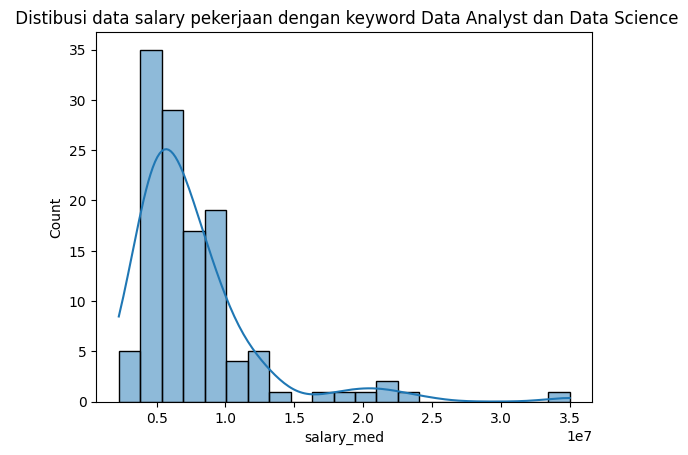

In [43]:
sns.histplot(data = df_jobsalary, x = 'salary_med', kde=True)
plt.title(" Distibusi data salary pekerjaan dengan keyword Data Analyst dan Data Science")
plt.show()

In [44]:
# Filtering job title, yaitu yg memuat data analyst / scientist / science

df_da_salary = df_jobsalary[df_jobsalary['job_title'].str.contains('data analyst|scientist|science', case=False)]
df_da_salary.shape[0]

39

In [45]:
round(df_da_salary.describe())

,salary_min,salary_max,salary_med
count,39.0,39.0,39.0
mean,6146154.0,8023077.0,7084615.0
std,4438281.0,6029946.0,5225169.0
min,2000000.0,2500000.0,2250000.0
25%,4500000.0,6000000.0,5250000.0
50%,5200000.0,6500000.0,5750000.0
75%,6500000.0,9000000.0,7750000.0
max,30000000.0,40000000.0,35000000.0


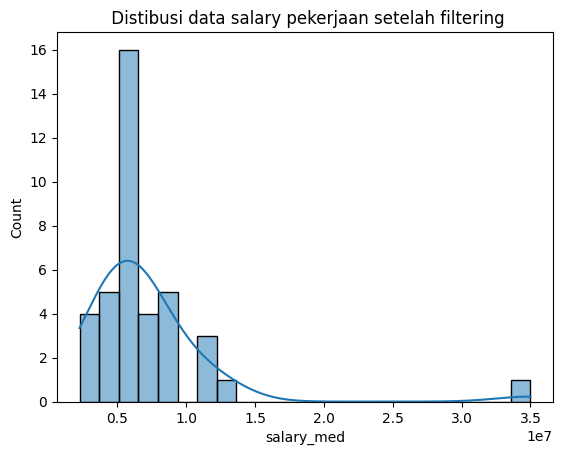

In [46]:
sns.histplot(data = df_da_salary, x = 'salary_med', kde=True)
plt.title(" Distibusi data salary pekerjaan setelah filtering")
plt.show()

Insight:

Distribusi data salary adalah skewed ke kanan dengan outlier / nilai ekstrem muncul setelah angka 20000000. Nilai outlier ini perlu dilihat dulu apakah masuk akal atau tidak. 

In [47]:
df_da_salary_upper = df_da_salary[df_da_salary['salary_med'] >= 20000000].sort_values(by='salary_med', ascending=False)
df_da_salary_upper

,link,job_title,company,company_rating,location,salary,job_classification,work_type,salary_min,salary_max,work_location,city,province,salary_med
391,https://id.jobstreet.com/id/job/86156808?type=standard&ref=search-standalone&origin=cardTitle#sol=f35d81dd2a4a7bb14f9cd75f8f9bc32824ac617d,Head of Data Analyst (Non-IT),Talent Search Recruitment Consultant,NaN,"Jakarta Selatan, Jakarta Raya",30000000 - 40000000,"Matematika, Statistik & Teknik Informasi (Sains & Teknologi)",Full time,30000000.0,40000000.0,On-Site,Jakarta Selatan,Jakarta Raya,35000000.0


Dapat dilihat bahwa 2 dari 4 job yang mencantumkan avg gajinya 10 juta ke atas, adalah berposisi sebagai Head of, 
yang wajar karena memiliki tanggung jawab yang besar pula.

In [48]:
# hapus gaji ekstrem
Q1 = df_da_salary['salary_med'].quantile(0.25)
Q3 = df_da_salary['salary_med'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned_da_salary = df_da_salary[(df_da_salary['salary_med'] >= lower_bound) & (df_da_salary['salary_med'] <= upper_bound)]
df_cleaned_da_salary.shape[0]

36

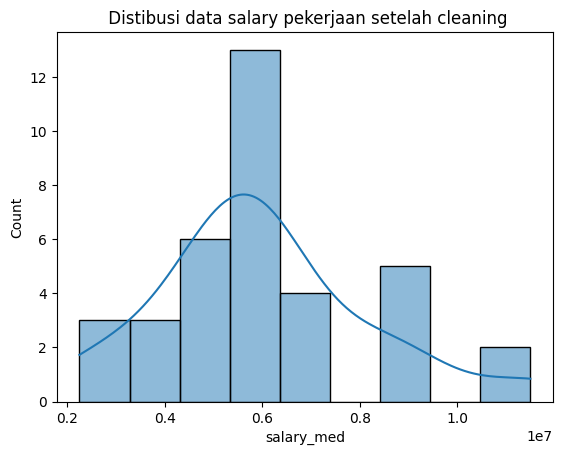

In [49]:
sns.histplot(data = df_cleaned_da_salary, x = 'salary_med', kde=True)
plt.title(" Distibusi data salary pekerjaan setelah cleaning")
plt.show()

Insight:

Distribusi data salary setelah di-handle nilai ekstremnya adalah berbentuk cenderung normal.

In [50]:
# Rata-rata gaji DA/DS sebelum dihilangkan nilai ekstremnya

avg = df_da_salary['salary_med'].mean()
print("Rp", round(avg))

Rp 7084615


In [51]:
# Rata-rata gaji DA/DS sesudah dihilangkan nilai ekstremnya

avg1 = df_cleaned_da_salary['salary_med'].mean()
print("Rp", round(avg1))

Rp 6022222


In [52]:
round(df_cleaned_da_salary.describe())

,salary_min,salary_max,salary_med
count,36.0,36.0,36.0
mean,5269444.0,6775000.0,6022222.0
std,1868203.0,2499643.0,2165326.0
min,2000000.0,2500000.0,2250000.0
25%,4375000.0,5750000.0,5062500.0
50%,5000000.0,6250000.0,5600000.0
75%,6000000.0,8000000.0,6812500.0
max,10000000.0,13000000.0,11500000.0


Insight:

Dapat dilihat, bahwa rata-rata gaji profesi Data Analyst / Data Scientist yang bisa ditawarkan perusahaan-perusahaan lewat aplikasi Jobstreet berkisar di angka Rp. 5.962.000, dengan gaji terendah yang ditawarkan adalah Rp. 2.000.000 dan gaji tertinggi yang ditawarkan adalah Rp.10.000.000. Ini belum termasuk perusahaan-perusahaan yang tidak menampilkan gaji yang bisa ditawarkan di aplikasi.

In [53]:
groupby_province = df_cleaned_da_salary.groupby('province').agg(
    avg_salary=('salary_med', lambda x:round(x.mean())),
    job_count=('salary_med', 'count')
).sort_values(by='avg_salary', ascending=False).reset_index()

groupby_province

,province,avg_salary,job_count
0,Jawa Timur,9000000,2
1,Jakarta Raya,7157143,14
2,Jawa Barat,5525000,8
3,Sumatera Utara,5500000,2
4,Banten,5166667,6
5,Sulawesi Selatan,3900000,1
6,Lampung,3500000,1
7,Jawa Tengah,2500000,2


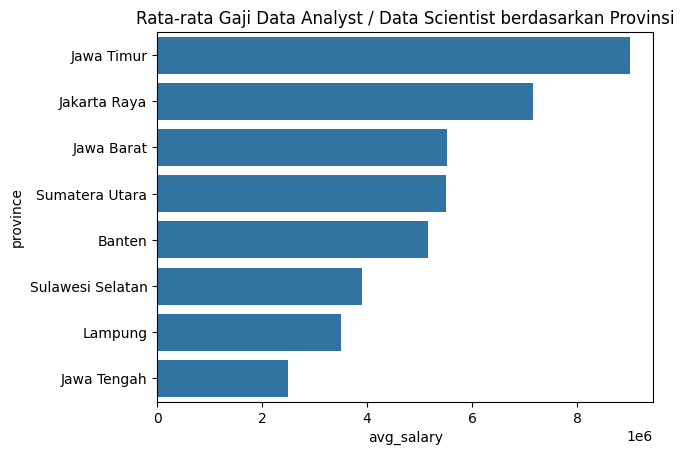

In [54]:
sns.barplot(x=groupby_province['avg_salary'], y=groupby_province['province'])
plt.title('Rata-rata Gaji Data Analyst / Data Scientist berdasarkan Provinsi')
plt.show()

In [55]:
groupby_location = df_cleaned_da_salary.groupby('city').agg(
    avg_salary=('salary_med', lambda x:round(x.mean())),
    job_count=('salary_med', 'count')
).sort_values(by='avg_salary', ascending=False).reset_index()

groupby_location

,city,avg_salary,job_count
0,Surabaya,9000000,2
1,Jakarta Barat,8500000,3
2,Jakarta Raya,7671429,7
3,Tangerang,6583333,3
4,Kabupaten Bekasi,6250000,3
5,Cileungsi,5750000,1
6,Jakarta Selatan,5500000,1
7,Medan,5500000,2
8,Jakarta Utara,5166667,3
9,Bandung,4925000,4


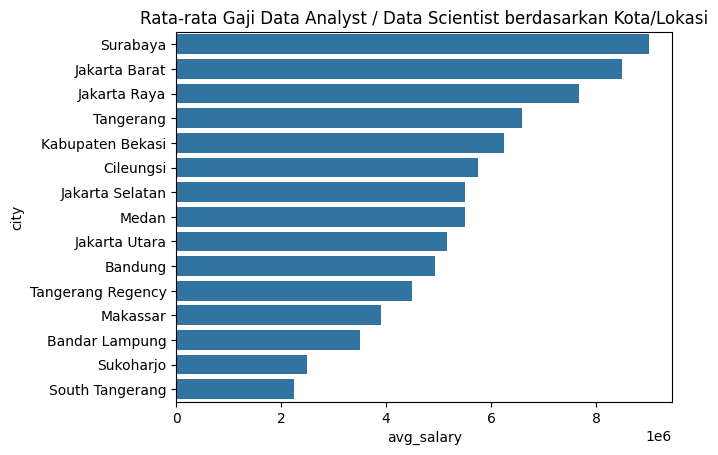

In [56]:
sns.barplot(x=groupby_location['avg_salary'], y=groupby_location['city'])
plt.title('Rata-rata Gaji Data Analyst / Data Scientist berdasarkan Kota/Lokasi')
plt.show()

Insight:

1. Jawa Timur menempati posisi teratas provinsi dengan rata-rata gaji untuk profesi DA/DS yang ditawarkan sekitar Rp 7,85 juta yang berasal dari 3 lowongan, diikuti oleh Jakarta Raya dengan rata-rata gaji yang ditawarkan sekitar Rp 6,2 juta yang berasal dari 14 lowongan.
2. Lampung menempati posisi terbawah dengan gaji yang ditawarkan sekitar Rp 3,5 juta yang berasal dari 1 lowongan.
3. Surabaya menempati posisi tertinggi kota dengan rata-rata gaji untuk profesi DA/DS yang ditawarkan sekitar Rp 9 juta yang berasal dari 2 lowongan, diikuti oleh Jakarta Barat dengan rata-rata gaji yang ditawarkan sekitar Rp 8,5 juta yang berasal dari 2 lowongan.
4. Bandar Lampung menempati posisi terbawah kota dengan gaji yang ditawarkan sekitar Rp 3,5 juta yang berasal dari 1 lowongan.

Kesimpulan:

1) Dari total 628 lowongan, hanya sebagian kecil yang mencantumkan gaji (sekitar 131 lowongan). Kemudian, setelah difilter khusus untuk posisi Data Analyst/Data Scientist, tersisa 41 data. Terakhir, setelah membersihkan nilai ekstrim (outlier), digunakan 35 data untuk analisis utama.
2) Untuk level entry/mid Data Analyst / Data Scientist di Jobstreet, gaji yang wajar berkisar Rp 5–7 juta.
3) Gaji tertinggi justru terlihat di Surabaya & beberapa area Jakarta. Di luar jawa masih menawarkan gaji lebih rendah, kemungkinan karena demand & cost of living yang berbeda.

